In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [4]:
df = pd.read_csv("customer_churn_data.csv")
df

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes
...,...,...,...,...,...,...,...,...,...,...
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes
996,997,62,Male,9,80.93,Month-to-Month,NaN,728.37,No,Yes
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes
998,999,39,Male,68,65.67,One-Year,NaN,4465.56,No,Yes


In [10]:
df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [16]:
df["InternetService"] = df["InternetService"].fillna("")

In [17]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


In [20]:
print(df.duplicated().sum())

0


In [21]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [23]:
numeric_columns_data = df.select_dtypes(include= ["number"])

In [25]:
numeric_columns_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


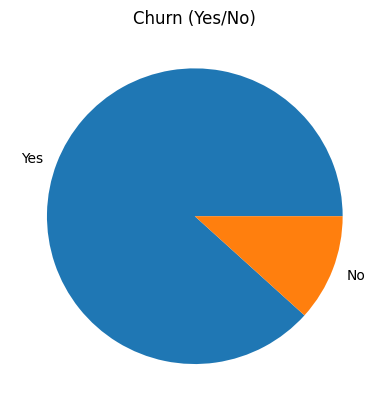

In [39]:
df["Churn"].value_counts().plot(kind = "pie")
plt.title("Churn (Yes/No)")
plt.ylabel("")
plt.show()


In [40]:
df.head(10)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes
5,6,42,Female,16,119.75,Two-Year,DSL,1916.00,Yes,Yes
6,7,60,Male,14,80.32,One-Year,,1124.48,No,Yes
7,8,52,Female,6,58.90,One-Year,,353.40,No,Yes
8,9,40,Female,53,49.81,Two-Year,Fiber Optic,2639.93,Yes,No
9,10,50,Female,10,61.55,Month-to-Month,Fiber Optic,615.50,Yes,Yes


In [41]:
df["InternetService"].value_counts()

InternetService
Fiber Optic    395
DSL            308
               297
Name: count, dtype: int64

In [45]:
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [46]:
df.groupby(["Churn","Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [47]:
df.groupby("Churn")["Tenure"].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

In [48]:
df.groupby('Churn')["Age"].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

In [50]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


<Axes: xlabel='ContractType'>

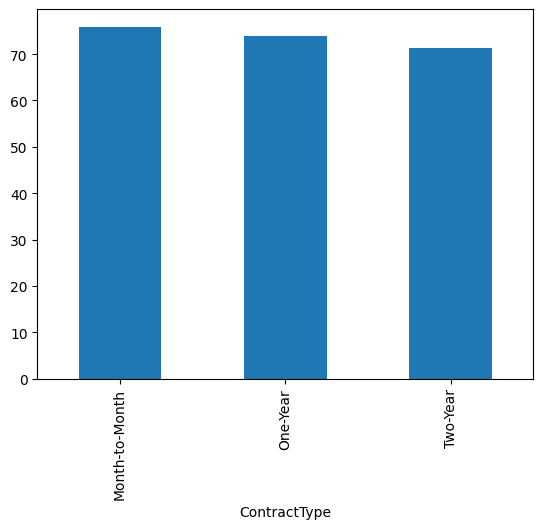

In [ ]:
df.groupby('ContractType')["MonthlyCharges"].mean().plot(kind = "bar")
plt.title()

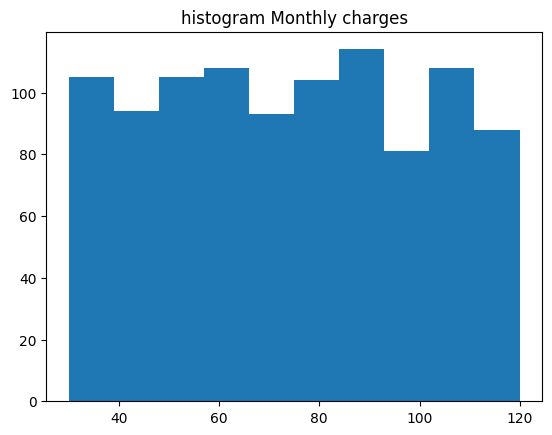

In [64]:
plt.hist(df["MonthlyCharges"])
plt.title('histogram Monthly charges')
plt.show()

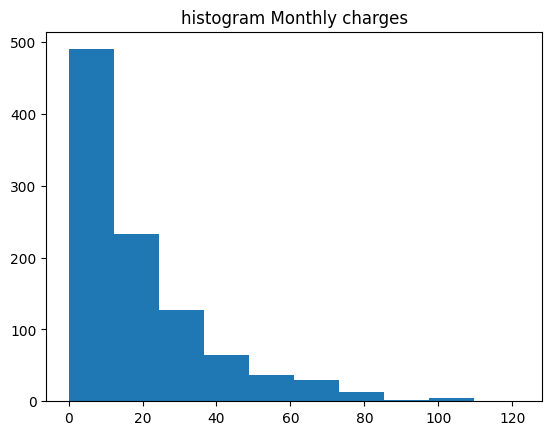

In [71]:
plt.hist(df["Tenure"])
plt.title('histogram Monthly charges')
plt.show()

In [72]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [77]:
y = df[["Churn"]]
X =  df[['Age',"Gender","Tenure","MonthlyCharges"]]

In [78]:
X

,Age,Gender,Tenure,MonthlyCharges
0,49,Male,4,88.35
1,43,Male,0,36.67
2,51,Female,2,63.79
3,60,Female,8,102.34
4,42,Male,32,69.01
...,...,...,...,...
995,42,Male,41,37.14
996,62,Male,9,80.93
997,51,Female,15,111.72
998,39,Male,68,65.67


In [86]:
X["Gender"] = X["Gender"].apply(lambda x: 1 if x == "Female" else 0)

C:\Users\sirig\AppData\Local\Temp\ipykernel_5128\2388402656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Gender"] = X["Gender"].apply(lambda x: 1 if x == "Female" else 0)


In [93]:
y["Churn"].apply(lambda x : 1 if x == "Yes" else 0)

0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: Churn, Length: 1000, dtype: int64

In [94]:
y

,Churn
0,1
1,1
2,1
3,1
4,1
...,...
995,1
996,1
997,1
998,1


     Age  Gender  Tenure  MonthlyCharges
0     49       0       4           88.35
1     43       0       0           36.67
2     51       1       2           63.79
3     60       1       8          102.34
4     42       0      32           69.01
..   ...     ...     ...             ...
995   42       0      41           37.14
996   62       0       9           80.93
997   51       1      15          111.72
998   39       0      68           65.67
999   50       0       1           56.67

[1000 rows x 4 columns]


In [100]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [112]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [114]:
X_train = scaler.fit_transform(X_train)

In [115]:
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [210]:
X_test = scaler.fit_transform(X_test)

In [211]:
from sklearn.model_selection import GridSearchCV

In [212]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

In [213]:
import warnings
warnings.filterwarnings("ignore")

In [214]:
log_model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [215]:
predictions = log_model.predict(X_test)

In [216]:
from sklearn.metrics import accuracy_score

In [217]:
def modelperformance(predictions):
    print("Accuracy of the model is {}".format(accuracy_score(y_test,predictions)))

In [218]:
modelperformance(predictions)

Accuracy of the model is 0.875


In [219]:
from sklearn.neighbors import KNeighborsClassifier

In [220]:
param_grid = {
    "n_neighbors": [3,5,7,9],
    "weights": ["uniform","distance"]
}

In [221]:
gridkn = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5)

In [222]:
gridkn.fit(X_train,y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [3, 5, ...], 'weights': ['uniform', 'distance']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,7


In [223]:
gridkn.best_params_

{'n_neighbors': 7, 'weights': 'distance'}

In [224]:
predictions_KN = gridkn.predict(X_test)

In [225]:
modelperformance(predictions1)

Accuracy of the model is 0.865


In [226]:
from sklearn.svm import SVC

In [227]:
svm = SVC()

In [228]:
param_grid = {
    "C" : [0.01,0.1,0.5,1],
    "kernel" : ["linear","rbf","poly"]
}

In [229]:
gridsvc = GridSearchCV(svm,param_grid, cv = 5)

In [230]:
gridsvc.fit(X_train,y_train)

,estimator,SVC()
,param_grid,"{'C': [0.01, 0.1, ...], 'kernel': ['linear', 'rbf', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,0.01


In [231]:
gridsvc.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [232]:
predictions_SVC = gridsvc.predict(X_test)

In [233]:
modelperformance(predictions_SVC)

Accuracy of the model is 0.88


In [234]:
from sklearn.tree import DecisionTreeClassifier

In [235]:
param_grid = {
    "criterion" : ["gini","entropy"],
    "splitter" : ["best","random"],
    "max_depth" : [None,10,20,30],
    "min_samples_split" : [2,5,10],
    "min_samples_leaf" :[1,2,4]
}

In [236]:
grid_tree = GridSearchCV(DecisionTreeClassifier(),param_grid,cv = 5)

In [237]:
grid_tree.fit(X_train,y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [238]:
grid_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'splitter': 'random'}

In [239]:
predictions_DT = grid_tree.predict(X_test)

In [240]:
modelperformance(predictions_DT)

Accuracy of the model is 0.85


In [241]:
from sklearn.ensemble import RandomForestClassifier

In [242]:
rfc_model = RandomForestClassifier()

In [243]:
param_grid = {
    "n_estimators" : [32,64,128,256],
    "max_features" : [2,3,4],
    "bootstrap" : [True, False]
}

In [244]:
grid_rfc = GridSearchCV(rfc_model,param_grid, cv = 5)

In [245]:
grid_rfc.fit(X_train,y_train)

,estimator,RandomForestClassifier()
,param_grid,"{'bootstrap': [True, False], 'max_features': [2, 3, ...], 'n_estimators': [32, 64, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,128


In [246]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 128}

In [247]:
predictions_RF = grid_rfc.predict(X_test)

In [248]:
modelperformance(predictions_RF)

Accuracy of the model is 0.86


In [249]:
best_model = gridsvc.best_estimator_

In [250]:
joblib.dump(best_model, "model.pkl")

['model.pkl']